In [1]:
# generic
import pandas as pd
import os, glob
import numpy as np
import scipy as sp

# geospatial plotting
import cartopy
import cartopy.crs as ccrs 
import cartopy.feature as cfeature
from cartopy import config
import cartopy.mpl.ticker as cticker
from cartopy.util import add_cyclic_point
from cartopy.io.img_tiles import GoogleTiles

# display
from IPython.display import Image

# plotting
import matplotlib.pyplot as plt
import seaborn as sns

# handling netCDFs
from netCDF4 import Dataset
import xclim as xc
import xarray as xr

<frozen importlib._bootstrap>:228: UserWarning: PROJ 8+ is required. Current version: 7.2.1


In [2]:
# open a netCDFs downloaded from the curl script
# read in all the netcdfs in a folder, and make a dict with the run number as the key and xarrays values

# The first five members of ARISE-SAI-1.5 simulations were initialized in 2035 from the first five members (001 to 005) 
# of the SSP2-45 simulations carried out with CESM2(WACCM6); hence, all had different initial ocean, sea-ice, land, 
# and atmospheric initial conditions on January 1, 2035. Similarly to the SSP2-45 simulations, subsequent ensemble members 
# (006 through 010) were initialized from the same initial conditions as members 001 through 005, respectively, 
# with an addition of a small temperature perturbation to the atmospheric initial condition to create ensemble spread.
# ([6, 7, 8, 9, 10] x 10ˆ-14 K, respectively)

def parse_data(fp_to_nc_folder):
    
#     if 'control' in fp_to_nc_folder:
        
#     elif 'sai' in fp_to_nc_folder:
    
    # lists to hold the netcdfs and their run numbers 
    run_numbers = []
    nc_names = []

    # read all the files matching the input file path
    for nc_file in glob.glob(fp_to_nc_folder):

        # open them!
        with open(os.path.join(os.getcwd(), nc_file), 'r') as f: 

            # extract the run number from the file name and add it to a list to ID each file
            # this assumes all ARISE-SAI files have more or less the same filename and location of the run number within it, may need to be updated
            run_numbers.append(pd.Series(nc_file).str.split(pat = 'DEFAULT.')[0][1].split('.cam')[0])

            # open each nc file and add that to another list
            nc_names.append(xr.open_dataset(nc_file))

    # combine the lists into a dict ordered by keys (run numbers low to high)
    data_dict = dict(sorted(dict(zip(run_numbers, nc_names)).items()))

    return(data_dict)

### Test the parsing function and basic plotting abilities on the TMSO2 data

In [3]:
# use this function on the TMSO2 data
TMSO2_dict = parse_data('./project-data/sai/TMSO2/*.nc')

# check array dimensions 
#TMSO2_dict['001'].variables['TMSO2'][0,:,:].shape, dataset.variables['lat'].shape, dataset.variables['lon'].shape

<class 'numpy.ma.core.MaskedArray'> (289,) <class 'xarray.core.dataarray.DataArray'> (192,) <class 'numpy.ma.core.MaskedArray'> (192, 289)


Text(0.5, 1.0, 'Mean SO2 Column Burden - ARISE-SAI-1.5 Ensemble 1 2035-2070 - (kg m^-2)')

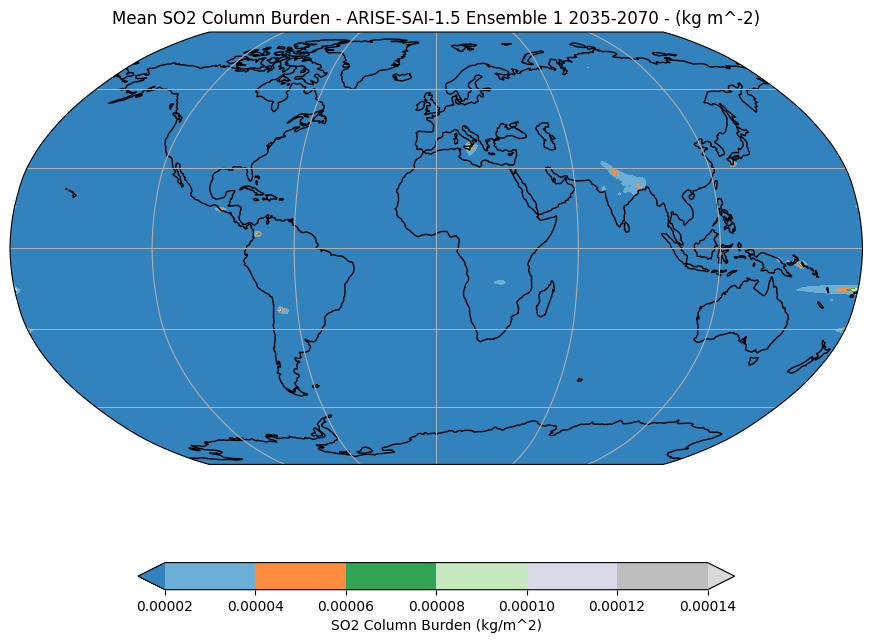

In [36]:
# Note the syntax for isolating different variables and time filtering
# dataset = TMSO2_dict['001']#.sel(time=slice("2035-01-01", "2036-01-02"))
# tmso2 = dataset.variables['TMSO2'][0, :, :]
# lats = dataset.variables['lat'][:]
# lons = dataset.variables['lon'][:]

# mean across time of TMSO2 data
ds = TMSO2_dict['001']
ds_mean = ds.mean(dim = 'time')

# Make the figure larger
fig = plt.figure(figsize=(11,8.5))

# Set the axes using the specified map projection
ax=plt.axes(projection=ccrs.Robinson())

# Add cyclic point to data
data=ds_mean['TMSO2']
data, lons = add_cyclic_point(data, coord=ds['lon'])


# Make a filled contour plot
cs=ax.contourf(lons, ds['lat'], data,
               transform = ccrs.PlateCarree(),
               cmap = 'tab20c',
               extend = 'both')

print(type(lons), lons.shape, type(ds['lat']), ds['lat'].shape, type(data), data.shape)

# Add coastlines
ax.coastlines()

# add gridlines
ax.gridlines()

# Add colorbar
cbar = plt.colorbar(cs,shrink=0.7,orientation='horizontal',label='SO2 Column Burden (kg/m^2)')

# Add title
plt.title('Mean SO2 Column Burden - ARISE-SAI-1.5 Ensemble 1 2035-2070 - (kg m^-2)')

# Rainfall tests
Originally tested ANRAIN, found that existance of levels makes plotting difficult \
Legacy ANRAIN code included as comments, now plotting for TMQ

In [51]:
# use this function on the TMSO2 data
# TMSO2_dict = parse_data('./project-data/sai/TMSO2/*.nc')

# Need to fix parsing function for control data FPs and to specify whether to use control or sai folder
# rain_control_dict = parse_data('./project-data/control/ANRAIN/*.nc')
# rain_sai_dict = parse_data('./project-data/sai/ANRAIN/*.nc')

# Manually select two of the files (first ensemble run) from the control and SAI model outputs
# control_rain001 = xr.open_dataset('./project-data/control/ANRAIN/b.e21.BWSSP245cmip6.f09_g17.CMIP6-SSP2-4.5-WACCM.001.cam.h0.ANRAIN.201501-206412.nc')
# sai_rain001 = xr.open_dataset('./project-data/sai/ANRAIN/b.e21.BW.f09_g17.SSP245-TSMLT-GAUSS-DEFAULT.001.cam.h0.ANRAIN.203501-206912.nc')

# # make these comparable by giving them the same time windows
# sai_rain001_t1 = sai_rain001.sel(time=slice("2035-01-01", "2069-12-31")).mean(dim = 'time')
# control_rain001_t1 = control_rain001.sel(time=slice("2035-01-01", "2069-12-31")).mean(dim = 'time')

# time_mean_t1001_diff = sai_rain001_t1 - control_rain001_t1

In [53]:
# manually read in first ensemble run of the netCDFs for TMQ
sai_rain001 = xr.open_dataset('./project-data/sai/TMQ/b.e21.BW.f09_g17.SSP245-TSMLT-GAUSS-DEFAULT.001.cam.h0.TMQ.203501-206912.nc')
control_rain001 = xr.open_dataset('./project-data/control/TMQ/b.e21.BWSSP245cmip6.f09_g17.CMIP6-SSP2-4.5-WACCM.001.cam.h0.TMQ.201501-206412.nc')

# time subset to match time periods, and average across them
sai_rain001_t1 = sai_rain001.sel(time=slice("2035-01-01", "2069-12-31")).mean(dim = 'time')
control_rain001_t1 = control_rain001.sel(time=slice("2035-01-01", "2069-12-31")).mean(dim = 'time')

# find the difference in the time averaged precip between SAI and control
time_mean_t1001_diff = sai_rain001_t1 - control_rain001_t1

<class 'numpy.ma.core.MaskedArray'> (289,) <class 'xarray.core.dataarray.DataArray'> (192,) <class 'numpy.ma.core.MaskedArray'> (192, 289)


Text(0.5, 1.0, 'Change in mean ANRAIN between control and SAI-ARISE Ensemble 1 2035-2070')

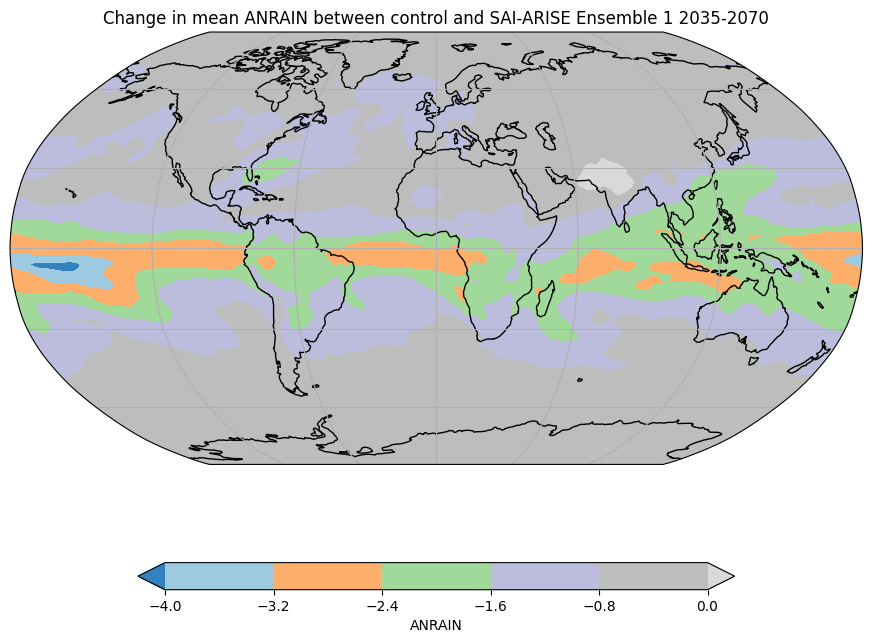

In [60]:
# Make the figure larger
fig = plt.figure(figsize=(11,8.5))

# Set the axes using the specified map projection
ax = plt.axes(projection=ccrs.Robinson())

# Add cyclic point to data
data = time_mean_t1001_diff['TMQ']
data, lons = add_cyclic_point(data, coord=ds['lon'])

# print(type(lons), lons.shape, type(control_rain001['lat']), control_rain001['lat'].shape, type(data), data.shape)

# Make a filled contour plot
cs=ax.contourf(lons, control_rain001['lat'], data,
               transform = ccrs.PlateCarree(),
               cmap = 'tab20c',
               extend = 'both')

# Add coastlines
ax.coastlines()

# add gridlines
ax.gridlines()

# Add colorbar
cbar = plt.colorbar(cs,shrink=0.7,orientation='horizontal',label='ANRAIN')

# Add title
plt.title('Change in mean TMQ between control and SAI-ARISE Ensemble 1 2035-2070')